In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
u_1 = np.array([2, 2])
u_2 = np.array([-5, -3])

In [3]:
cov_1 = np.array([[0.5, 1], 
                  [1, 1]])
cov_2 = np.array([[1.5, 2], 
                  [2, 0.1]])

In [4]:
d_1 = np.random.multivariate_normal(u_1, cov_1, 500)
d_2 = np.random.multivariate_normal(u_2, cov_2, 500)

C:\Users\DELL 5410\AppData\Local\Temp\ipykernel_13416\103381402.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  d_1 = np.random.multivariate_normal(u_1, cov_1, 500)
C:\Users\DELL 5410\AppData\Local\Temp\ipykernel_13416\103381402.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  d_2 = np.random.multivariate_normal(u_2, cov_2, 500)


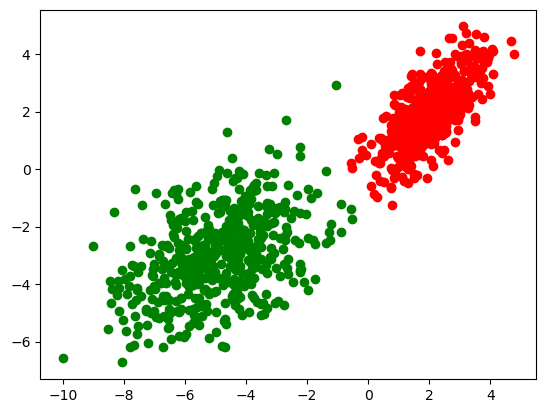

In [5]:
plt.scatter(d_1[:, 0], d_1[:, 1], color='red')
plt.scatter(d_2[:, 0], d_2[:, 1], color='green')

In [6]:
np.random.multivariate_normal?

In [7]:
dataset = np.ones((1000, 4))

In [8]:
dataset[:5]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [9]:
dataset[:500, 1:3] = d_1
dataset[500:, 1:3] = d_2

In [10]:
dataset[:5]

array([[1.        , 2.83358597, 3.26211548, 1.        ],
       [1.        , 3.10939556, 4.96304745, 1.        ],
       [1.        , 3.72917231, 2.43786844, 1.        ],
       [1.        , 1.77533875, 1.9738733 , 1.        ],
       [1.        , 3.80774449, 3.89429446, 1.        ]])

In [11]:
dataset[:500, -1] = 0

In [12]:
dataset[:5]

array([[1.        , 2.83358597, 3.26211548, 0.        ],
       [1.        , 3.10939556, 4.96304745, 0.        ],
       [1.        , 3.72917231, 2.43786844, 0.        ],
       [1.        , 1.77533875, 1.9738733 , 0.        ],
       [1.        , 3.80774449, 3.89429446, 0.        ]])

In [13]:
dataset[-5:]

array([[ 1.        , -7.04663733, -3.48590846,  1.        ],
       [ 1.        , -4.28488255, -3.07819921,  1.        ],
       [ 1.        , -3.3626329 , -0.21054965,  1.        ],
       [ 1.        , -5.34896687, -3.43033193,  1.        ],
       [ 1.        , -3.10077208, -1.82637955,  1.        ]])

In [14]:
np.random.shuffle(dataset)

In [15]:
dataset

array([[ 1.        ,  3.23938977,  3.75516631,  0.        ],
       [ 1.        , -2.24817428, -3.56957526,  1.        ],
       [ 1.        ,  1.48531029, -0.31611814,  0.        ],
       ...,
       [ 1.        ,  2.75304426,  1.92179788,  0.        ],
       [ 1.        ,  0.97111423,  0.37997057,  0.        ],
       [ 1.        ,  1.81526361,  2.35356415,  0.        ]])

In [16]:
X_train = dataset[:800, :-1]
Y_train = dataset[:800, -1]

X_test = dataset[800:, :-1]
Y_test = dataset[800:, -1]

In [17]:
X_test.shape, Y_test.shape, X_train.shape, Y_train.shape

((200, 3), (200,), (800, 3), (800,))

In [18]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [19]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [20]:
random_values = np.linspace(-300, 300, 20)

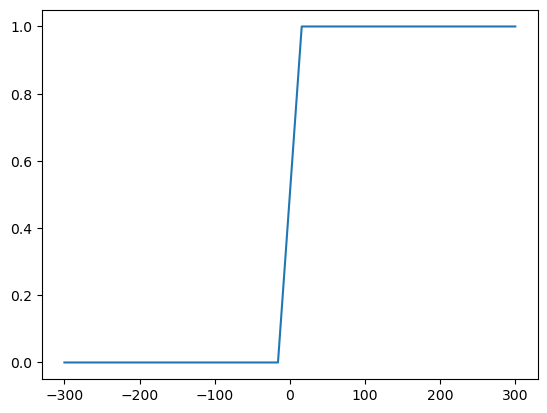

In [21]:
plt.plot(random_values, sigmoid(random_values))

In [22]:
def cost(X, Y, theta):
    y_p = hypothesis(X, theta)
    
    loss = -1*(np.mean(Y*np.log(y_p) + (1 - Y)*np.log(1 - y_p)))
    
    return loss

In [23]:
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)
    
    grad = X.T@(Y - y_p)
    
    return grad/X.shape[0]

In [24]:
def gradient_descent(X, Y, learning_rate = 0.003, epochs = 1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    
    cost_epoch = []
    
    for i in range(epochs):
        print("The algo is on epoch no.:", i, end='\r')
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta = theta + learning_rate*grad
        
    return theta, cost_epoch

In [25]:
Y_train = Y_train.reshape((-1, 1))
X_train.shape

(800, 3)

In [26]:
theta, cost = gradient_descent(X_train, Y_train, epochs=2000)

In [27]:
theta

array([[-0.26320229],
       [-0.95278815],
       [-0.68908246]])

In [28]:
cost[:10]

[0.6931471805599452,
 0.6800988842572948,
 0.6674798647067997,
 0.6552755236277216,
 0.6434714738510453,
 0.6320535778645778,
 0.6210079809326134,
 0.6103211390455331,
 0.5999798420030263,
 0.5899712319690067]

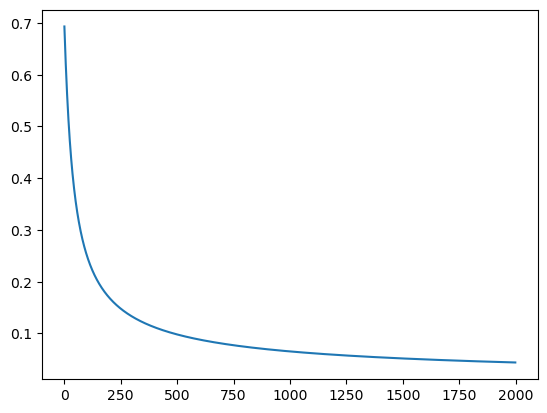

In [29]:
plt.plot(cost)

In [30]:
cost[-10:]

[0.04411702205567491,
 0.04410455091770651,
 0.04409208984478983,
 0.04407963882365948,
 0.044067197841074185,
 0.04405476688381678,
 0.04404234593869408,
 0.04402993499253689,
 0.04401753403219992,
 0.04400514304456173]

In [31]:
Y_test = Y_test.reshape((-1, 1))
Y_test.shape

(200, 1)

In [32]:
def predict(X, theta):
    y_p = hypothesis(X, theta)
    y_pred = []
    for i in y_p:
        if i>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    y_pred = np.array(y_pred)
    return y_pred

In [33]:
pred = predict(X_test, theta)

In [34]:
pred = pred.reshape((-1, 1))
pred.shape

(200, 1)

In [35]:
Y_test.shape

(200, 1)

In [36]:
for i in range(len(pred)):
    print(pred[i], Y_test[i])

[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[

In [37]:
def accuracy(pred, label):
    temp = 0
    
    for i in range(pred.shape[0]):
        if pred[i]==label[i]:
            temp+=1
        else:
            pass
    print("Accuracy = ", (temp/pred.shape[0])*100, "%", sep='')
    return (temp/pred.shape[0])*100

In [38]:
accuracy(pred, Y_test)

Accuracy = 99.5%


99.5